<a href="https://colab.research.google.com/github/stellarboymihir/ML_now2.0/blob/main/03_LinearRegression/3a_Univariate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

> This notebook was created for code illustration of the `ML.now()` course


`Univariate Linear Regression`

[Link to Download the dataset](https://archive.ics.uci.edu/ml/datasets/Student+Performance)

**Date Created**: June 6, 2021


**Author**:
 Shivani Shimpi 

**Reach out**:
[Email](https://www.google.com/intl/en-GB/gmail/about/#) | [GitHub](https://github.com/shivanishimpi) | [LinkedIn](https://www.linkedin.com/in/shivani-shimpi-5113a8170/)

[[Course Repository](https://github.com/shivanishimpi/MLnow_2.0)]

Feel free to check out my [website](http://shivanishimpi.github.io/) for more information

## Setup

In [17]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [18]:
cd '/content/drive/MyDrive/Courses/ML.now()/CodeArchive/student'

[Errno 2] No such file or directory: '/content/drive/MyDrive/Courses/ML.now()/CodeArchive/student'
/content


In [19]:
ls

drive/  sample_data/


In [20]:
import os

In [21]:
import pandas as pd #working with csv or excel files
import numpy as np #working with numbers/ arrays/ tensors
import tensorflow as tf #framework
from tensorflow import keras #API / library 
import os #using os commands between the python language

In [22]:
mathData = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Gs script/student-mat.csv', sep=';') #load the csv file as dataframe

In [23]:
mathData.head(10) #print the first ten rows of the dataframe

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10
5,GP,M,16,U,LE3,T,4,3,services,other,reputation,mother,1,2,0,no,yes,yes,yes,yes,yes,yes,no,5,4,2,1,2,5,10,15,15,15
6,GP,M,16,U,LE3,T,2,2,other,other,home,mother,1,2,0,no,no,no,no,yes,yes,yes,no,4,4,4,1,1,3,0,12,12,11
7,GP,F,17,U,GT3,A,4,4,other,teacher,home,mother,2,2,0,yes,yes,no,no,yes,yes,no,no,4,1,4,1,1,1,6,6,5,6
8,GP,M,15,U,LE3,A,3,2,services,other,home,mother,1,2,0,no,yes,yes,no,yes,yes,yes,no,4,2,2,1,1,1,0,16,18,19
9,GP,M,15,U,GT3,T,3,4,other,other,home,mother,1,2,0,no,yes,yes,yes,yes,yes,yes,no,5,5,1,1,1,5,0,14,15,15


We are just going to consider the columns `G1` and `G3` for univariate linear regression

$G3_i = G1_i  \cdot \theta_1 + \theta_0$

In [24]:
uniMathData = mathData[['G1', 'G3']]
uniMathData.head(5)

,G1,G3
0,5,6
1,5,6
2,7,10
3,15,15
4,6,10


In [25]:
uniMathData.to_csv('univariate_MathData_2.csv')

In [26]:
ls

drive/  sample_data/  univariate_MathData_2.csv


## Data visualization

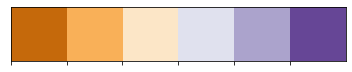

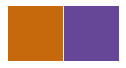

In [27]:
import seaborn as sns
sns.palplot(sns.color_palette('PuOr')) #Purple to Orange colors
pal = sns.color_palette('PuOr', 6) #print 6 color shades from Purple to Orange
pal.as_hex() #set hex code values for colors

import matplotlib.pyplot as plt
plt.style.use(['seaborn'])
sns_colors = ['#c6690c', '#664697'] #orange Purple hex codes
sns.set_palette(sns_colors) #set the palette as sns_colors 
sns.palplot(sns.color_palette(sns_colors)) #plot the color codes

In [28]:
uniMathData.columns #columns in the dataframe

Index(['G1', 'G3'], dtype='object')

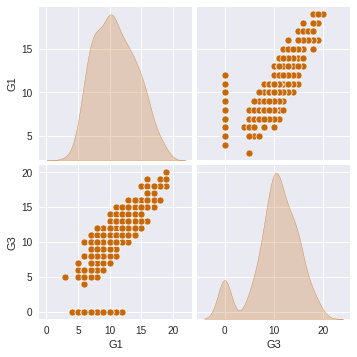

In [29]:
#pairplot for all the values

sns.pairplot(uniMathData,
             x_vars = ['G1', 'G3'],
             y_vars =  ['G1', 'G3'],
       diag_kind='kde'
             )

## Data Splits

In [30]:
#80-20 train-test percent split

trainDataset = uniMathData.sample(frac=0.8, random_state=0) 
testDataset = uniMathData.drop(trainDataset.index)

print(trainDataset.head())
print(testDataset.head())

     G1  G3
329  14  14
318  11  10
317   9   9
65   16  15
59   15  16
    G1  G3
9   14  15
25   6   8
28  11  11
31  17  17
32  17  16


In [31]:
print(trainDataset.shape)
print(testDataset.shape)

(316, 2)
(79, 2)


In [32]:
#copy the trainDataset dataframe for getting the features

trainFeatures = trainDataset.copy()
testFeatures = testDataset.copy()

print(trainFeatures.head())
print(testFeatures.head())

     G1  G3
329  14  14
318  11  10
317   9   9
65   16  15
59   15  16
    G1  G3
9   14  15
25   6   8
28  11  11
31  17  17
32  17  16


In [33]:
#removing the G3 column and saving it into the labels variable

trainLabels = trainFeatures.pop('G3')
testLabels = testFeatures.pop('G3')

print(trainLabels.head())
print(testLabels.head())

329    14
318    10
317     9
65     15
59     16
Name: G3, dtype: int64
9     15
25     8
28    11
31    17
32    16
Name: G3, dtype: int64


In [34]:
print(trainFeatures.head())
print(testFeatures.head())

     G1
329  14
318  11
317   9
65   16
59   15
    G1
9   14
25   6
28  11
31  17
32  17


In [35]:
# univariate -> num(features) = 1
# multvariate -> num(features) > 1 = 11


model = tf.keras.Sequential([
                             tf.keras.layers.Dense(1)

])

In [36]:
model.compile(
    loss = 'mean_absolute_error', #minimizing the MAE loss
    optimizer = tf.keras.optimizers.Adam(0.001), #learning rate specified as 0.001
    # optimizer = 'adam', #takes the default learning rate
    metrics = ['mae', 'mse'] #meanSquare and meanAbsolute error metrics
)

In [37]:
numEpochs = 300
history = model.fit(x = trainFeatures, y = trainLabels, validation_data = (testFeatures, testLabels), epochs = numEpochs)

Epoch 1/300
10/10 [==============================] - 1s 18ms/step - loss: 4.2176 - mae: 4.2176 - mse: 20.5404 - val_loss: 4.1125 - val_mae: 4.1125 - val_mse: 18.9630
Epoch 2/300
10/10 [==============================] - 0s 3ms/step - loss: 4.1164 - mae: 4.1164 - mse: 19.6866 - val_loss: 4.0053 - val_mae: 4.0053 - val_mse: 18.0571
Epoch 3/300
10/10 [==============================] - 0s 3ms/step - loss: 4.0195 - mae: 4.0195 - mse: 18.9071 - val_loss: 3.8972 - val_mae: 3.8972 - val_mse: 17.1780
Epoch 4/300
10/10 [==============================] - 0s 3ms/step - loss: 3.9182 - mae: 3.9182 - mse: 18.1009 - val_loss: 3.7912 - val_mae: 3.7912 - val_mse: 16.3480
Epoch 5/300
10/10 [==============================] - 0s 3ms/step - loss: 3.8197 - mae: 3.8197 - mse: 17.3602 - val_loss: 3.6843 - val_mae: 3.6843 - val_mse: 15.5438
Epoch 6/300
10/10 [==============================] - 0s 5ms/step - loss: 3.7225 - mae: 3.7225 - mse: 16.6467 - val_loss: 3.5769 - val_mae: 3.5769 - val_mse: 14.7690
Epoch 7/3

In [38]:
print(history)

In [39]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


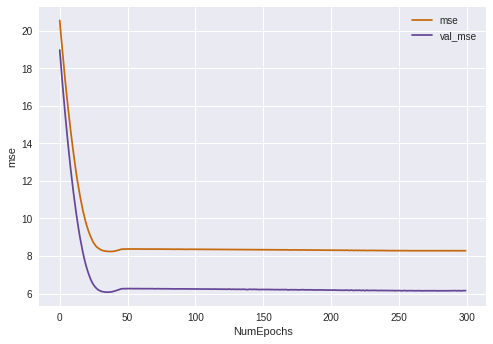

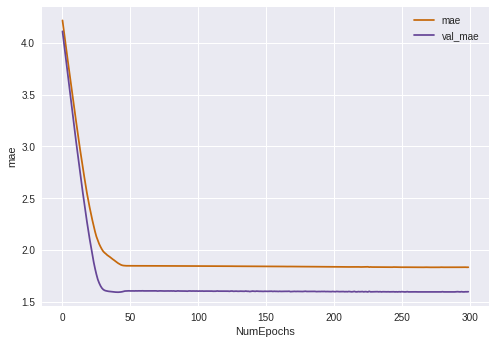

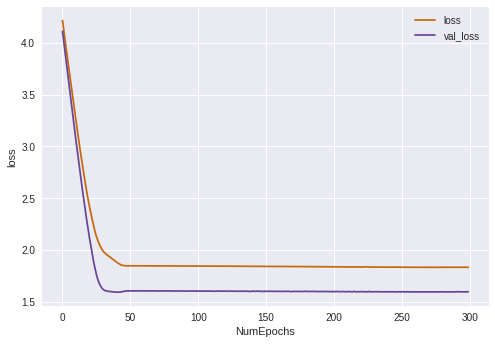

In [40]:
# tempString = 'mse'
def curvePlots(tempString):
  plt.plot(history.history[tempString])
  plt.plot(history.history[f'val_{tempString}'])
  plt.xlabel('NumEpochs')
  plt.ylabel(tempString)
  plt.legend([tempString, f'val_{tempString}'])
  plt.show()


curvePlots('mse')
curvePlots('mae')
curvePlots('loss')

In [41]:
model.predict([1])

array([[1.0034313]], dtype=float32)

In [42]:
# testPreds = model.predict(testFeatures).flatten() #array of all prediction values

#for single values

print(f'Prediction for input value 1: {model.predict([1])}')


# for a list of values
tempListforPreds = [1,2,3,4,5]
print(f'''

input List = {tempListforPreds}


List of Predictions:
{model.predict(tempListforPreds)}

List of Predictions (flattened out):
{model.predict(tempListforPreds).flatten()}
''')

Prediction for input value 1: [[1.0034313]]


input List = [1, 2, 3, 4, 5]


List of Predictions:
[[1.0034313]
 [2.0036576]
 [3.0038838]
 [4.00411  ]
 [5.004336 ]]

List of Predictions (flattened out):
[1.0034313 2.0036576 3.0038838 4.00411   5.004336 ]



In [43]:
print(testFeatures)

     G1
9    14
25    6
28   11
31   17
32   17
..   ..
365  10
367   7
379  10
381   7
393  11

[79 rows x 1 columns]


In [44]:
testPreds = model.predict(testFeatures).flatten() #array of all prediction values

In [45]:
print(len(testPreds))
print(testPreds)

79
[14.0063715  6.0045624 11.0056925 17.00705   17.00705   12.005919
 14.0063715 19.007502  19.007502   8.005014  14.0063715 13.0061455
  8.005014   7.0047884  9.00524   13.0061455 11.0056925 16.006823
  7.0047884 10.005466  15.0065975 13.0061455 14.0063715 16.006823
  7.0047884  7.0047884  8.005014  10.005466  12.005919  10.005466
 12.005919  13.0061455 10.005466   6.0045624  9.00524   12.005919
  7.0047884  8.005014  14.0063715  9.00524    9.00524    7.0047884
 12.005919   6.0045624 13.0061455  7.0047884  7.0047884 11.0056925
 13.0061455 17.00705   12.005919  15.0065975  9.00524   12.005919
 15.0065975 12.005919  15.0065975 12.005919  15.0065975 11.0056925
 12.005919   8.005014  16.006823   7.0047884 16.006823  11.0056925
 16.006823  13.0061455  8.005014   8.005014  12.005919  18.007275
 13.0061455 16.006823  10.005466   7.0047884 10.005466   7.0047884
 11.0056925]


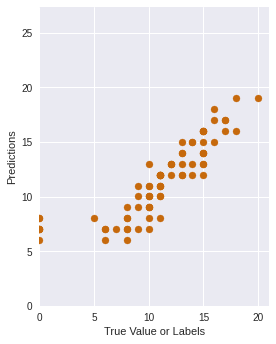

In [46]:
# prediciton plot --> how well is your model predicting across the actual labels

def predPlot(labels, predictions):
  plt.scatter(labels, predictions)
  plt.ylabel('Predictions')
  plt.xlabel('True Value or Labels')
  plt.axis('equal')
  plt.axis('square')
  plt.xlim([0, plt.xlim()[1]])
  plt.ylim([0, plt.ylim()[1]])
  plt.show()

predPlot(testLabels, testPreds)

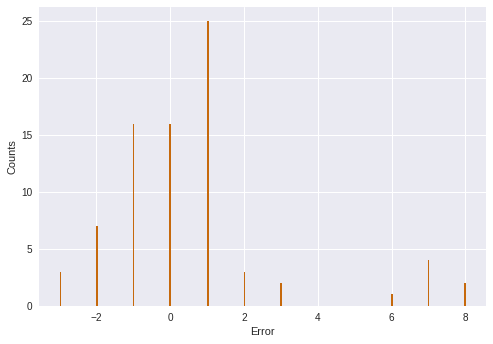

In [47]:
#error plot --> gaussian distribution 

def errorPlot(preds, labels, counts):
  errors = preds - labels
  plt.hist(errors, counts)
  plt.xlabel('Error')
  plt.ylabel('Counts')
  plt.show()

errorPlot(testPreds, testLabels, numEpochs)

Note: 


Validation loss `val_loss` is a metric that tells you how much deviation from the actual label can you expect in the predicted label

To optimize your predicitons -->

- Hyperparameter tuning --> `numEpochs`, `optimizer`, `learning_rate`, lossFunctions